# Heart Disease UCI Analysis

Detection if someone suffers of a heart disease is an important task where detection the disease as fast as possible could save lives.

In this kernel we will try to predict if someone has a hearth disease using algorithms like Logistic Regression, XGBosst, ...

Besides creating a good model we will also interprete the model so we can be sure why it makes certain predictions.

## Table of Content
1. Explanatory data analysis
2. Creating categorical variables
3. Trying models
4. Trying models on categorical variables
5. Tuning parameters
    5.1 Tune LogisticRegression
    5.2 Tune XGBoost
    5.3 Tune LightGBM
6. Stacking models
7. Interpreting models
    7.1 Feature Importance
    7.2 Partial Dependence Plots
    7.3 2d Partial Dependence Plots
    7.4 Shap

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Model-Interpretation/blob/master/heart-disease-analysis.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Model-Interpretation/blob/master/heart-disease-analysis.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Install Kaggle API
%pip install -q kaggle
%pip install -q kaggle-cli

  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-iyjjymk6/lxml_79440ee8f1d84e2ab9cb05ff7caa1b25/setup.py'"'"'; __file__='"'"'/tmp/pip-install-iyjjymk6/lxml_79440ee8f1d84e2ab9cb05ff7caa1b25/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-84g1a06k/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/lxml Check the logs for full command output.


In [3]:
# only for google colab
import os
os.environ['KAGGLE_USERNAME'] = "<username>" 
os.environ['KAGGLE_KEY'] = "<key>"

In [4]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset --unzip

  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 5.52MB/s]


In [5]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


The data contains the following features:
* <b>age</b> age in years 
* <b>sex</b> (1=male; 0=female)
* <b>cp</b> chest pain type
* <b>trestbps</b> resting blood pressure (in mm Hg on admission to the hospital)
* <b>chol</b> serum cholestoral in mg/dl
* <b>fbs</b> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* <b>restecg</b> resting electrocardiographic results
* <b>thalach</b> maximum heart rate achieved 
* <b>exang</b> exercise induced angina (1 = yes; 0 = no)
* <b>oldpeak</b> ST depression induced by exercise relative to rest 
* <b>slope</b> the slope of the peak exercise ST segment 
* <b>ca</b> number of major vessels (0-3) colored by flourosopy 
* <b>thal</b> 3 = normal; 6 = fixed defect; 7 = reversable defect 
* <b>target</b> 1 or 0

## Explanatory Data Analysis

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

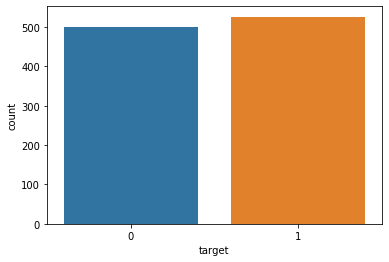

In [8]:
sns.countplot(x='target', data=df)
plt.show()

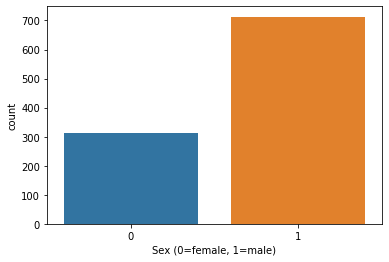

In [9]:
sns.countplot(x='sex', data=df)
plt.xlabel('Sex (0=female, 1=male)')
plt.show()

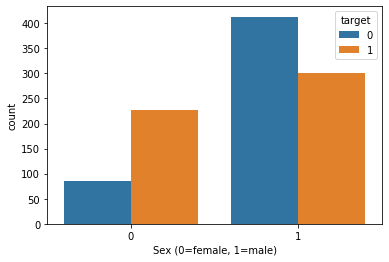

In [10]:
sns.countplot(x='sex', hue='target', data=df)
plt.xlabel('Sex (0=female, 1=male)')
plt.show()

In [11]:
percentFemale = len(df[df.sex==0])/len(df.sex)*100
percentMale = len(df[df.sex==1])/len(df.sex)*100
print(f'Percentage of Female Patients: {percentFemale:.2f}%')
print(f'Percentage of Male Patients: {percentMale:.2f}%')

Percentage of Female Patients: 30.44%
Percentage of Male Patients: 69.56%


In [12]:
percentFemaleWithDisease = len(df[(df.sex==0) & (df.target==1)])/len(df[df.sex==0])*100
percentMaleWithDisease = len(df[(df.sex==1) & (df.target==1)])/len(df[df.sex==1])*100
print(f'Percentage of Female Patients with Disease: {percentFemaleWithDisease:.2f}%')
print(f'Percentage of Male Patients with Disease: {percentMaleWithDisease:.2f}%')

Percentage of Female Patients with Disease: 72.44%
Percentage of Male Patients with Disease: 42.08%


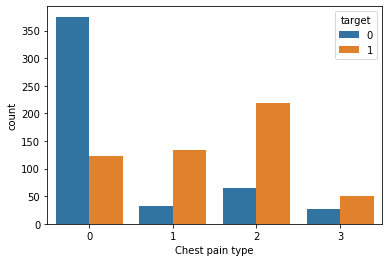

In [13]:
sns.countplot(x='cp', hue='target', data=df)
plt.xlabel('Chest pain type')
plt.show()

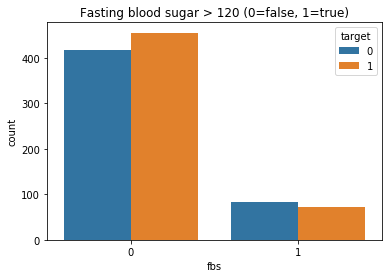

In [14]:
sns.countplot(x='fbs', hue='target', data=df)
plt.title('Fasting blood sugar > 120 (0=false, 1=true)')
plt.show()

In [15]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


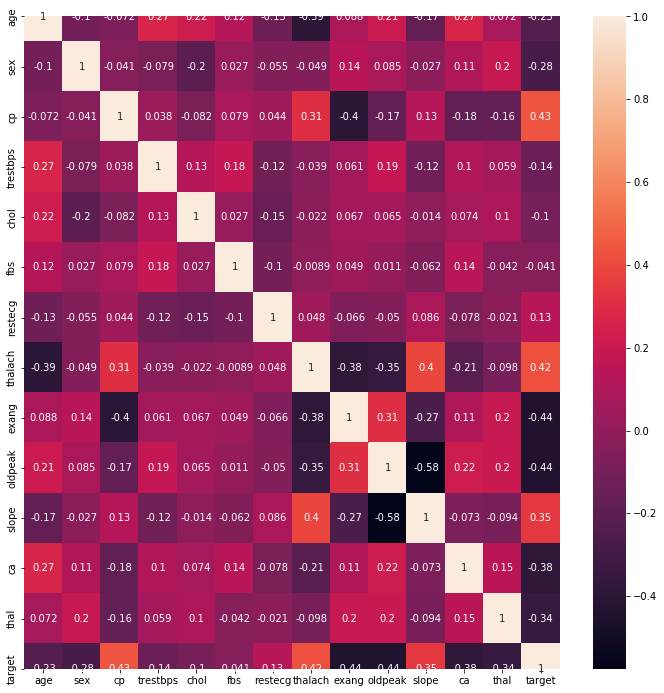

In [16]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, ax=ax)

## Creating categorical variables

In [17]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [18]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [19]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']

In [20]:
df_cat = df.astype(dict((item, 'object') for item in cat_columns))

In [21]:
df_cat.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [22]:
df_cat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [23]:
pd.__version__

'1.3.5'

In [24]:
df_cat = pd.get_dummies(df_cat, columns=cat_columns)
df_cat.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,target,sex_0,sex_1,...,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,2,2,0,0,1,...,0,0,1,0,1,0,0,0,0,1
1,53,140,203,155,3.1,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,1
2,70,145,174,125,2.6,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,61,148,203,161,0.0,2,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
4,62,138,294,106,1.9,1,3,0,1,0,...,1,0,1,0,1,0,0,0,1,0


## Trying models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb

In [26]:
train = np.array(df.drop('target', axis=1))
y_train = np.array(df['target'])

In [27]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5

def get_cv_scores(model, print_scores=True):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train)
    accuracy = cross_val_score(model, train, y_train, scoring="accuracy", cv = kf)
    f1_score = cross_val_score(model, train, y_train, scoring="f1", cv = kf)
    roc_auc_score = cross_val_score(model, train, y_train, scoring="roc_auc", cv = kf)
    if print_scores:
        print(f'Accuracy: {accuracy.mean():.3f} ({accuracy.std():.3f})')
        print(f'f1_score: {f1_score.mean():.3f} ({f1_score.std():.3f})')
        print(f'roc_auc_score: {roc_auc_score.mean():.3f} ({roc_auc_score.std():.3f})')
    return [accuracy, f1_score, roc_auc_score]

In [28]:
%%time
lr = LogisticRegression()
get_cv_scores(lr);

Accuracy: 0.844 (0.032)
f1_score: 0.855 (0.029)
roc_auc_score: 0.916 (0.033)
CPU times: user 711 ms, sys: 571 ms, total: 1.28 s
Wall time: 686 ms


In [29]:
%%time
svm = SVC()
get_cv_scores(svm);

Accuracy: 0.703 (0.029)
f1_score: 0.726 (0.030)
roc_auc_score: 0.756 (0.036)
CPU times: user 904 ms, sys: 81.8 ms, total: 986 ms
Wall time: 974 ms


In [30]:
%%time
rf = RandomForestClassifier()
get_cv_scores(rf);

Accuracy: 0.997 (0.006)
f1_score: 0.997 (0.006)
roc_auc_score: 0.999 (0.001)
CPU times: user 4.67 s, sys: 9.98 ms, total: 4.67 s
Wall time: 6.09 s


In [31]:
%%time
gb = GradientBoostingClassifier()
get_cv_scores(gb);

Accuracy: 0.964 (0.009)
f1_score: 0.965 (0.008)
roc_auc_score: 0.991 (0.008)
CPU times: user 3.33 s, sys: 6.24 ms, total: 3.34 s
Wall time: 4.61 s


In [32]:
%%time
et = ExtraTreesClassifier()
get_cv_scores(et);

Accuracy: 0.997 (0.006)
f1_score: 0.994 (0.007)
roc_auc_score: 1.000 (0.000)
CPU times: user 3.76 s, sys: 16.8 ms, total: 3.77 s
Wall time: 5.9 s


In [33]:
%%time
xgb_model = xgb.XGBClassifier()
get_cv_scores(xgb_model);

Accuracy: 0.954 (0.009)
f1_score: 0.956 (0.008)
roc_auc_score: 0.989 (0.008)
CPU times: user 1.44 s, sys: 38.5 ms, total: 1.48 s
Wall time: 2.55 s


In [34]:
%%time
lgb_model = lgb.LGBMClassifier()
get_cv_scores(lgb_model);

Accuracy: 0.997 (0.006)
f1_score: 0.997 (0.006)
roc_auc_score: 1.000 (0.000)
CPU times: user 1.36 s, sys: 140 ms, total: 1.5 s
Wall time: 2.13 s


## Trying model on categorical dataframe

In [35]:
train = np.array(df_cat.drop('target', axis=1))
y_train = np.array(df_cat['target'])

In [36]:
%%time
lr = LogisticRegression()
get_cv_scores(lr);

Accuracy: 0.855 (0.028)
f1_score: 0.863 (0.026)
roc_auc_score: 0.920 (0.024)
CPU times: user 1.06 s, sys: 1.34 s, total: 2.4 s
Wall time: 2.64 s


In [37]:
%%time
xgb_model = xgb.XGBClassifier()
get_cv_scores(xgb_model);

Accuracy: 0.958 (0.010)
f1_score: 0.959 (0.010)
roc_auc_score: 0.991 (0.006)
CPU times: user 1.8 s, sys: 66.1 ms, total: 1.86 s
Wall time: 2.55 s


In [38]:
%%time
lgb_model = lgb.LGBMClassifier()
get_cv_scores(lgb_model);

Accuracy: 0.997 (0.006)
f1_score: 0.997 (0.006)
roc_auc_score: 1.000 (0.000)
CPU times: user 1.39 s, sys: 88.2 ms, total: 1.48 s
Wall time: 2.04 s


## Tuning Parameters

In [39]:
train = np.array(df.drop('target', axis=1))
y_train = np.array(df['target'])

### Tune LogisticRegression

In [40]:
%%time
from sklearn.model_selection import RandomizedSearchCV

params = {
    'C': [0.1, 0.3, 1, 3],
    'max_iter': [50, 100, 200],
}

clf = RandomizedSearchCV(LogisticRegression(), params, cv=5, scoring='accuracy', random_state=1)
clf.fit(train, y_train)
print(clf.best_params_)

{'max_iter': 50, 'C': 0.1}
CPU times: user 2.57 s, sys: 2.26 s, total: 4.84 s
Wall time: 3.31 s


In [41]:
%%time
lg_tuned = LogisticRegression(**clf.best_params_)
get_cv_scores(lg_tuned)

Accuracy: 0.851 (0.037)
f1_score: 0.863 (0.034)
roc_auc_score: 0.913 (0.035)
CPU times: user 415 ms, sys: 292 ms, total: 708 ms
Wall time: 378 ms


### Tune XGBoost

In [42]:
%%time

params = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 800, 1100],
    'colsample_bytree': [0.5, 0.8, 1],
    'subsample': [0.5, 0.8, 1]
}

clf = RandomizedSearchCV(xgb.XGBClassifier(), params, cv=5, scoring='roc_auc', random_state=1)
clf.fit(train, y_train)
print(clf.best_params_)

{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'colsample_bytree': 1}
CPU times: user 19.1 s, sys: 284 ms, total: 19.4 s
Wall time: 19.3 s


In [43]:
%%time
xgb_model_tuned = xgb.XGBClassifier(**clf.best_params_)
get_cv_scores(xgb_model_tuned)

Accuracy: 0.997 (0.006)
f1_score: 0.997 (0.006)
roc_auc_score: 1.000 (0.000)
CPU times: user 4.21 s, sys: 52.7 ms, total: 4.26 s
Wall time: 4.24 s


### Tune LightGBM

In [44]:
%%time
params = {
    'max_depth': [3, 5, 7, -1],
    'n_estimators': [50, 100, 300, 800, 1100],
    'colsample_bytree': [0.5, 0.8, 1],
}

clf = RandomizedSearchCV(lgb.LGBMClassifier(), params, cv=5, scoring='roc_auc', random_state=1)
clf.fit(train, y_train)
print(clf.best_params_)

{'n_estimators': 1100, 'max_depth': -1, 'colsample_bytree': 0.8}
CPU times: user 5.74 s, sys: 470 ms, total: 6.21 s
Wall time: 6.2 s


In [45]:
%%time
lgb_model_tuned = xgb.XGBClassifier(**clf.best_params_)
get_cv_scores(lgb_model_tuned)

Accuracy: nan (nan)
f1_score: nan (nan)
roc_auc_score: nan (nan)
CPU times: user 49.9 ms, sys: 4.1 ms, total: 54 ms
Wall time: 53.5 ms


## Stacking Models

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin

# based on https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
class StackingAveragedModels(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    def fit(self, X, y):
        """Fit all the models on the given dataset"""
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        
        # Train cloned base models and create out-of-fold predictions
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        
        # Train meta-model on out-of-fold predicitions
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
    
    def predict_proba(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict_proba(meta_features)

In [47]:
%%time
stacked_averaged_model_1 = StackingAveragedModels(base_models=[GradientBoostingClassifier(), xgb.XGBClassifier(),
                                                               lgb.LGBMClassifier(),LogisticRegression()], meta_model=LogisticRegression())
stacked_averaged_model_1.fit(train, y_train)
get_cv_scores(stacked_averaged_model_1);

Accuracy: 0.992 (0.010)
f1_score: 0.992 (0.010)
roc_auc_score: nan (nan)
CPU times: user 20.5 s, sys: 737 ms, total: 21.2 s
Wall time: 20.9 s


## Interpreting models

### Feature importance

In [48]:
%pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import eli5
from eli5.sklearn import PermutationImportance

def get_feature_importance(model, X, y, feature_names):
    perm = PermutationImportance(model, random_state=42).fit(X, y)
    return eli5.show_weights(perm, feature_names=feature_names)

In [50]:
from sklearn.model_selection import train_test_split

train = np.array(df.drop('target', axis=1))
y_train = np.array(df['target'])

X_train, X_test, y_train, y_test = train_test_split(train ,y_train , test_size=0.2, random_state=1)

In [51]:
feature_names = df.drop('target', axis=1).columns.tolist()

#### LogisticRegression

In [52]:
lr = LogisticRegression(max_iter=50, C=0.3).fit(X_train, y_train)
get_feature_importance(lr, X_test, y_test, feature_names)

Weight,Feature
0.0488 ± 0.0254,ca
0.0429 ± 0.0425,cp
0.0254 ± 0.0199,sex
0.0107 ± 0.0242,thal
0.0088 ± 0.0340,oldpeak
0.0020 ± 0.0099,trestbps
-0.0010 ± 0.0073,age
-0.0020 ± 0.0048,fbs
-0.0020 ± 0.0146,thalach
-0.0029 ± 0.0117,slope


#### XGBoost

In [53]:
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=5, colsample_bytree=0.8, subsample=0.5).fit(X_train, y_train)
get_feature_importance(xgb_model, X_test, y_test, feature_names)

Weight,Feature
0.1190 ± 0.0181,ca
0.0722 ± 0.0298,cp
0.0654 ± 0.0318,thal
0.0468 ± 0.0201,age
0.0468 ± 0.0266,oldpeak
0.0341 ± 0.0222,chol
0.0283 ± 0.0143,sex
0.0176 ± 0.0117,slope
0.0166 ± 0.0159,thalach
0.0117 ± 0.0078,restecg


#### LightGBM

In [54]:
lgb_model = lgb.LGBMClassifier(n_estimators=50, max_depth=3, colsample_bytree=1).fit(X_train, y_train)
get_feature_importance(lgb_model, X_test, y_test, feature_names)

Weight,Feature
0.1132 ± 0.0129,ca
0.0800 ± 0.0306,cp
0.0478 ± 0.0272,oldpeak
0.0410 ± 0.0159,thal
0.0351 ± 0.0129,age
0.0254 ± 0.0257,chol
0.0205 ± 0.0114,sex
0.0137 ± 0.0156,restecg
0.0107 ± 0.0226,thalach
0.0029 ± 0.0132,trestbps


### Partial Dependence Plots

In [55]:
%pip install git+https://github.com/SauceCat/PDPbox.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SauceCat/PDPbox.git to /tmp/pip-req-build-6w0y8uj4
  Running command git clone -q https://github.com/SauceCat/PDPbox.git /tmp/pip-req-build-6w0y8uj4


In [56]:
from pdpbox import pdp, get_dataset, info_plots

from sklearn.model_selection import train_test_split

train = df.drop('target', axis=1)
y_train = df['target']

X_train, X_test, y_train, y_test = train_test_split(train ,y_train , test_size=0.2, random_state=1)

#### Gender

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


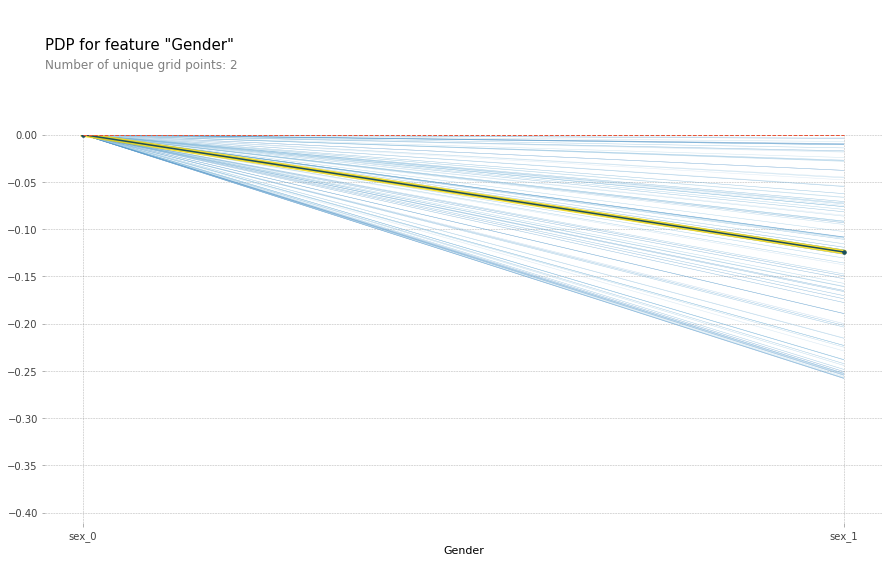

In [57]:
pdp_gender = pdp.pdp_isolate(model=lr, dataset=X_test, model_features=feature_names, feature='sex')

pdp.pdp_plot(pdp_gender, 'Gender', plot_lines=True, frac_to_plot=0.5)
plt.show()

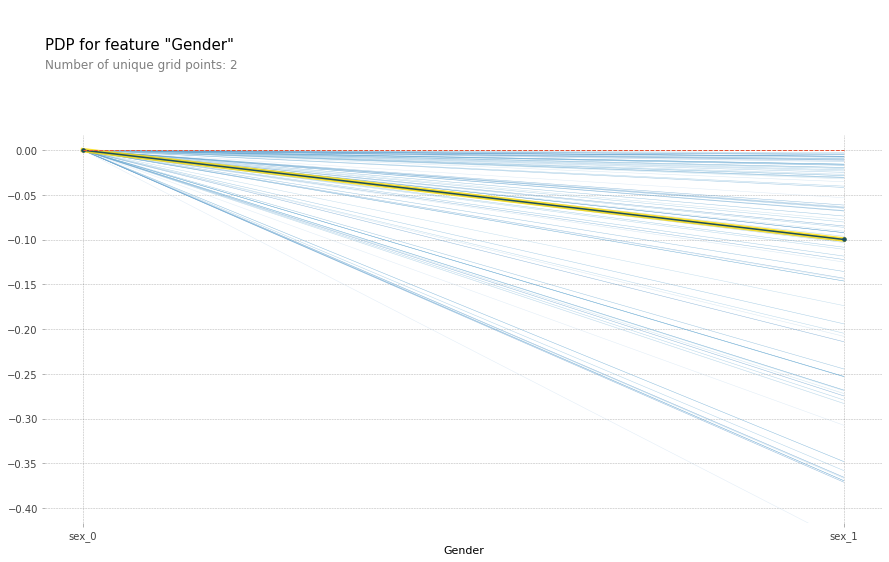

In [58]:
pdp_gender = pdp.pdp_isolate(model=lgb_model, dataset=X_test, model_features=feature_names, feature='sex')

pdp.pdp_plot(pdp_gender, 'Gender', plot_lines=True, frac_to_plot=0.5)
plt.show()

#### thal

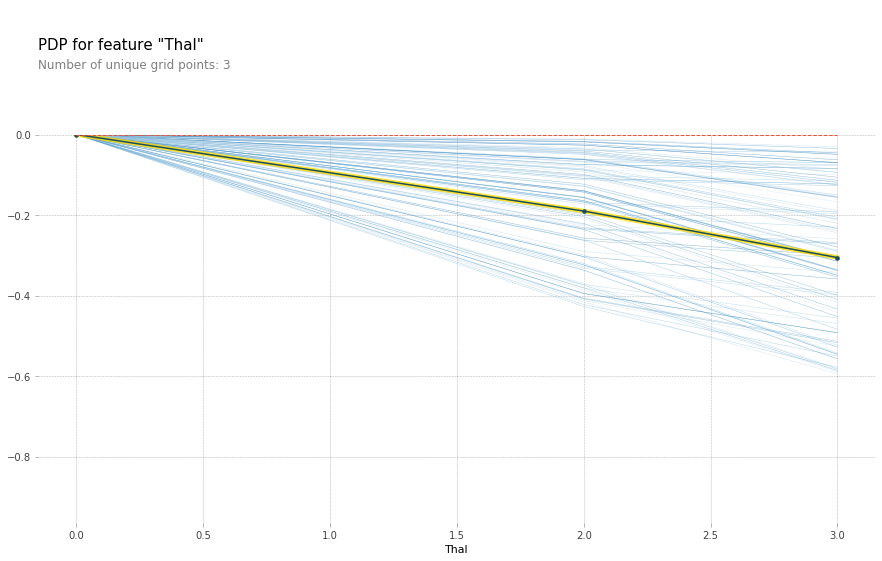

In [59]:
pdp_thal = pdp.pdp_isolate(model=lr, dataset=X_test, model_features=feature_names, feature='thal')

pdp.pdp_plot(pdp_thal, 'Thal', plot_lines=True, frac_to_plot=0.5)
plt.show()

#### ca 

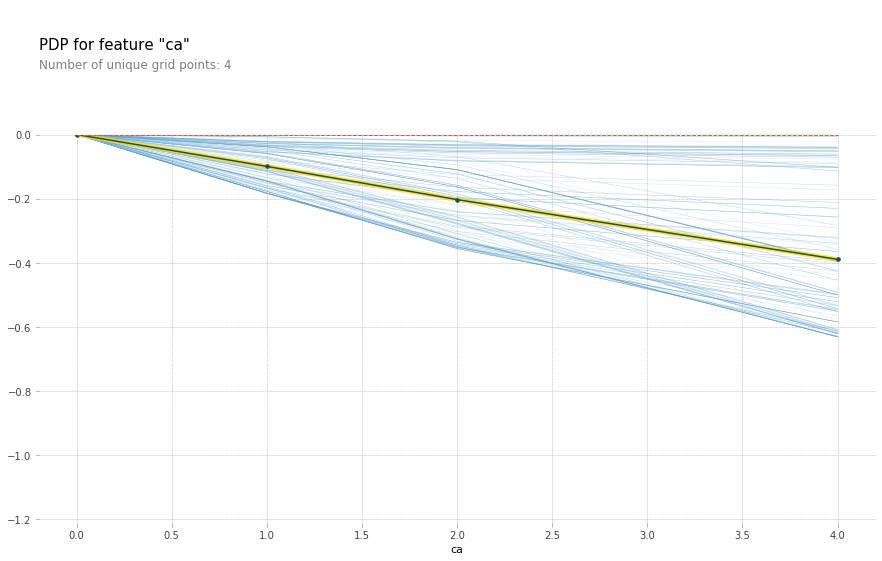

In [60]:
pdp_thal = pdp.pdp_isolate(model=lr, dataset=X_test, model_features=feature_names, feature='ca')

pdp.pdp_plot(pdp_thal, 'ca', plot_lines=True, frac_to_plot=0.5)
plt.show()

### 2d Partial Dependence Plots

#### Age + Gender

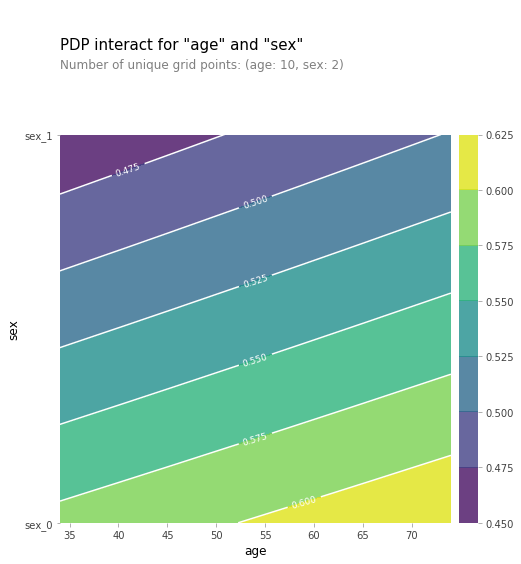

In [61]:
features_to_plot = ['age', 'sex']
inter1 = pdp.pdp_interact(model=lr, dataset=X_test, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

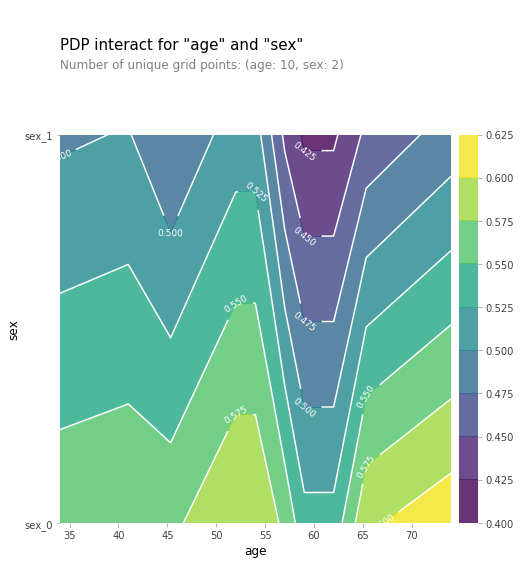

In [62]:
features_to_plot = ['age', 'sex']
inter1 = pdp.pdp_interact(model=lgb_model, dataset=X_test, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

#### CA + Gender

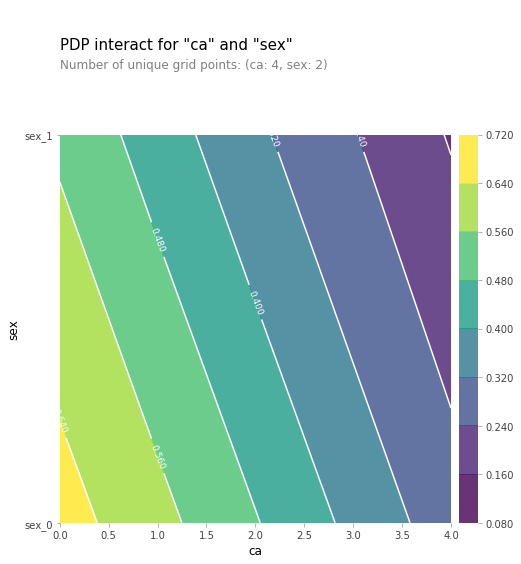

In [63]:
features_to_plot = ['ca', 'sex']
inter1 = pdp.pdp_interact(model=lr, dataset=X_test, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

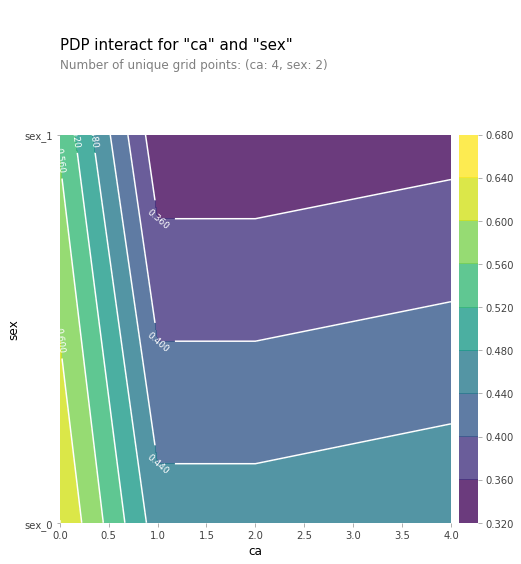

In [64]:
features_to_plot = ['ca', 'sex']
inter1 = pdp.pdp_interact(model=lgb_model, dataset=X_test, model_features=feature_names, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

### Shap Values

In [65]:
%pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
X_test.iloc[0:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3


In [67]:
y_test.iloc[0:5]

49     0
525    1
119    1
629    0
186    0
Name: target, dtype: int64

In [68]:
lr.predict_proba(np.array(X_test.iloc[0:5]))

array([[0.92066503, 0.07933497],
       [0.05865901, 0.94134099],
       [0.12746634, 0.87253366],
       [0.1489576 , 0.8510424 ],
       [0.96186534, 0.03813466]])

In [69]:
lgb_model.predict_proba(np.array(X_test.iloc[0:5]))

array([[0.95315207, 0.04684793],
       [0.04444231, 0.95555769],
       [0.07523238, 0.92476762],
       [0.62622875, 0.37377125],
       [0.93443219, 0.06556781]])

#### LightGBM Model

In [70]:
import shap

shap.initjs()

# Create a object that can calculate shap values for our logistic regression model
explainer = shap.TreeExplainer(lgb_model)

# Calculate Shap values
shap_values = explainer.shap_values(np.array(X_test))

In [71]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

In [72]:
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], X_test.iloc[1,:])

In [73]:
shap.force_plot(explainer.expected_value[1], shap_values[1][2,:], X_test.iloc[2,:])

### Partial Dependence Plots with Shap

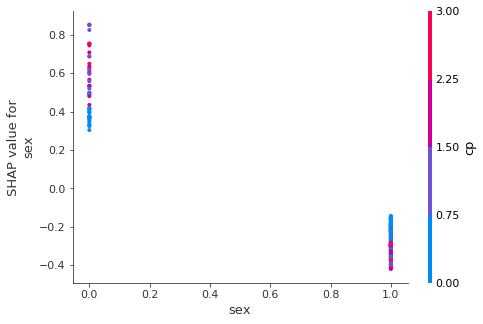

In [74]:
shap.dependence_plot('sex', shap_values[1], X_test)

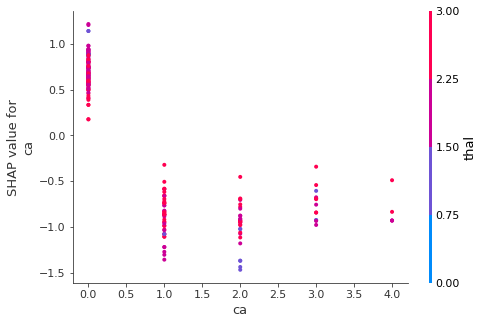

In [75]:
shap.dependence_plot('ca', shap_values[1], X_test)

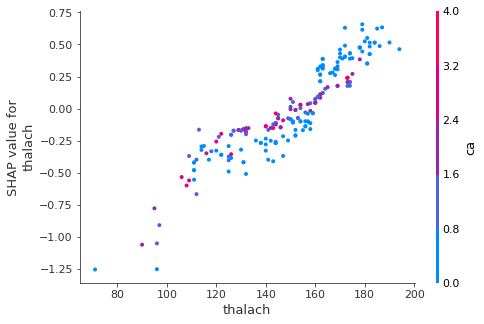

In [76]:
shap.dependence_plot('thalach', shap_values[1], X_test)

### Summary plot (simular to feature importance but more information)


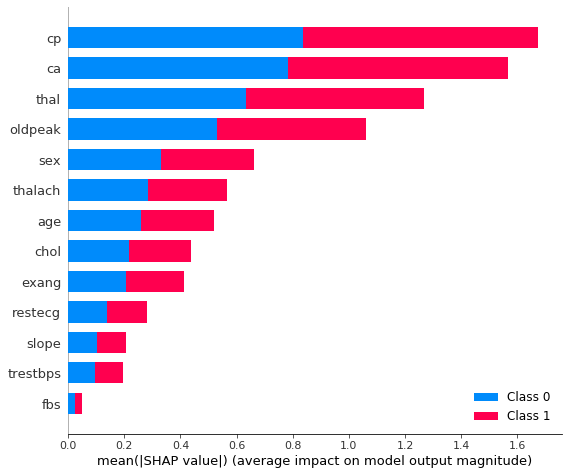

In [77]:
shap.summary_plot(shap_values, X_test)

## Conclusion
This dataset is pretty small for today's standards but is still gives us a pretty good look at different features that cause heart diseases.

This notebook isn't complete and I will try to approve it in the upcoming weeks. If you have any recommendations please leave a comment down below.